In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('car_price_data2.csv')

In [63]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [64]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [65]:
df.keys()

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [66]:
df.shape

(301, 9)

In [67]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Text(0, 0.5, 'Number of Car presents')

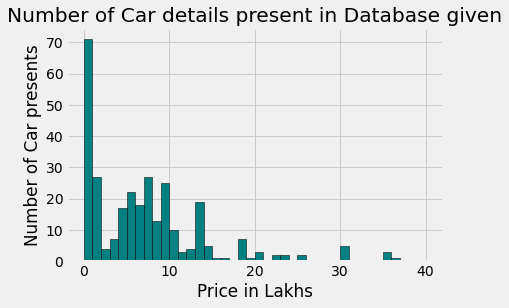

In [68]:
plt.style.use('fivethirtyeight')
bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
plt.hist(df['Present_Price'],bins=bins,edgecolor='black', color='teal')
plt.title('Number of Car details present in Database given')
plt.xlabel('Price in Lakhs')
plt.ylabel('Number of Car presents')

Text(0, 0.5, 'Price of new car in lakhs')

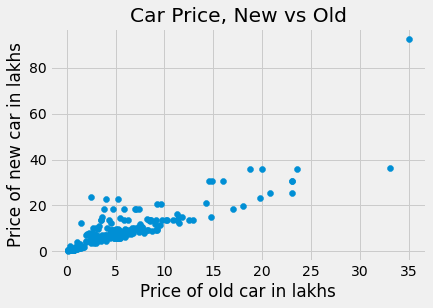

In [69]:
plt.scatter(df['Selling_Price'],df['Present_Price'])
plt.title('Car Price, New vs Old')
plt.xlabel('Price of old car in lakhs')
plt.ylabel('Price of new car in lakhs')

<AxesSubplot:>

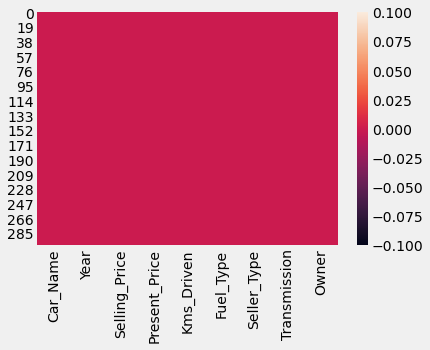

In [70]:
sns.heatmap(df.isnull())
#to dis[play null values, you will se lines over column which contains null value

<BarContainer object of 301 artists>

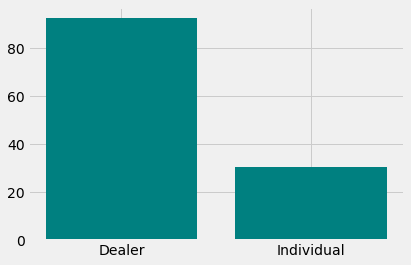

In [71]:
plt.bar(df['Seller_Type'], df['Present_Price'], color='teal')

<AxesSubplot:xlabel='Car_Name', ylabel='count'>

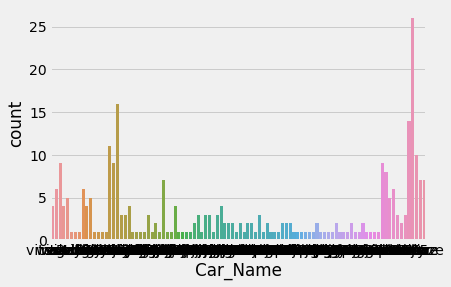

In [72]:
#countplot
#it display the count of variable with respect to other variables

sns.countplot(x='Car_Name',data=df)     #parameter fopllowed by argument passed

In [73]:
#replace purchase year by car age, as by knowing age, it will be more effective in predicting car price

df['Car_age']=2021-df['Year']  #creating new column

#column is added now drop the column

df.drop(labels='Year', axis=1, inplace=True)

In [74]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [75]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

### Dealing with categorical method

In [76]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [77]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [78]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [79]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [80]:
#now we have to chnage it to numerical value and drop them

In [81]:
#dropping car name, because converting it into nnumberi9cal require n-1 column
df=df.drop(labels='Car_Name', axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [82]:
clean_data=pd.get_dummies(df, drop_first=True)

clean_data

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [83]:
#it got rid of the string values in one shot

##### check for the multicollinearity using VIF

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
variables=clean_data[['Present_Price', 'Kms_Driven','Owner','Car_age','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]     
#we are taking as a list of all feature variable

In [86]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in  range(variables.shape[1])]

In [87]:
vif["Features"]=variables.columns
vif

,VIF,Features
0,3.204463,Present_Price
1,2.892740,Kms_Driven
2,1.087681,Owner
3,10.831000,Car_age
4,4.891105,Fuel_Type_Diesel
5,14.342446,Fuel_Type_Petrol
6,2.230725,Seller_Type_Individual
7,8.392371,Transmission_Manual


In [88]:
#we have to drop the column with large inflation factor, and take the column of inflation factor we wanted

In [89]:
#lets try dropping one by one and check vif

In [90]:
data_no_multicollinearity=clean_data.drop('Fuel_Type_Petrol',axis=1)

In [91]:
#calcating multicollinearity again

In [92]:
variables=clean_data[['Present_Price', 'Kms_Driven','Owner','Car_age','Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual']]     
#we are taking as a list of all feature variable
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in  range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,2.544336,Present_Price
1,2.886452,Kms_Driven
2,1.082447,Owner
3,8.713539,Car_age
4,1.706132,Fuel_Type_Diesel
5,1.904835,Seller_Type_Individual
6,4.666095,Transmission_Manual


In [93]:
#we have to drop the car age column also

In [94]:
data_no_multicollinearity=clean_data.drop('Car_age',axis=1)
data_no_multicollinearity

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,1,0,1
1,4.75,9.54,43000,0,1,0,0,1
2,7.25,9.85,6900,0,0,1,0,1
3,2.85,4.15,5200,0,0,1,0,1
4,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,0,0,1
297,4.00,5.90,60000,0,0,1,0,1
298,3.35,11.00,87934,0,0,1,0,1
299,11.50,12.50,9000,0,1,0,0,1


In [95]:
variables=clean_data[['Present_Price', 'Kms_Driven','Owner','Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual']]     
#we are taking as a list of all feature variable
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in  range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,2.200428,Present_Price
1,1.883557,Kms_Driven
2,1.065887,Owner
3,1.669188,Fuel_Type_Diesel
4,1.748669,Seller_Type_Individual
5,2.465705,Transmission_Manual


In [96]:
data_no_multicollinearity.drop(labels='Fuel_Type_Petrol', axis=1)

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,0,1
1,4.75,9.54,43000,0,1,0,1
2,7.25,9.85,6900,0,0,0,1
3,2.85,4.15,5200,0,0,0,1
4,4.60,6.87,42450,0,1,0,1
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,0,1
297,4.00,5.90,60000,0,0,0,1
298,3.35,11.00,87934,0,0,0,1
299,11.50,12.50,9000,0,1,0,1


In [97]:
#splitting the data in featured variables and dependent variable

x=data_no_multicollinearity.drop('Selling_Price',axis=1)

y=data_no_multicollinearity['Selling_Price']

In [98]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x[['Present_Price','Kms_Driven']])

StandardScaler()

In [99]:
##Training and Testing split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Linear Regresion

In [100]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)

In [101]:
y_pred1

array([ 6.88964206,  0.96164601,  3.88984693,  8.36915728, 14.02105143,
        4.39441057,  4.13182723,  0.94941662,  6.05140004,  5.19658685,
        3.47598139,  1.1263384 ,  3.98364301,  7.71311028,  7.84649064,
       13.29880406,  7.11197167,  4.01657233,  0.56173689,  1.47029759,
        6.18974754,  2.776493  ,  7.05249176,  7.22235454, -0.1797864 ,
        0.98802991, -0.47264098,  0.75781258,  0.8861119 ,  8.70752758,
        4.32302694,  7.37294654,  0.63949642,  7.52199065,  4.7588688 ,
        1.18695626,  4.90138059,  6.68329541, -1.02977555,  8.77280008,
        8.28768365, 20.23172023,  4.30469526,  2.70694603,  6.66802818,
        9.16239515,  0.36592768,  1.10496168,  5.03205302,  7.13496559,
        8.58800249,  3.61101905,  4.70045817, 20.10841249,  0.99582927,
        0.81892049,  0.73988511,  2.69648666,  3.33467925,  0.29032312,
        6.18858764])

In [102]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [103]:
from sklearn.metrics import mean_squared_error,r2_score


In [104]:
r_squared1=r2_score(y_test,y_pred1)
r_squared1

0.8795077661641192

In [105]:
mse1=mean_squared_error(y_test,y_pred1)
mse1

3.045720579913846

### Decision Tree Regression

In [106]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dr=DecisionTreeRegressor(random_state=0)
dr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [107]:
y_pred2=dr.predict(x_test)

In [108]:
y_pred2

array([ 4.95 ,  0.4  ,  4.4  ,  7.25 , 14.25 ,  5.3  ,  2.9  ,  0.25 ,
        5.15 ,  5.225,  2.   ,  0.9  ,  4.85 ,  6.7  ,  7.75 , 14.25 ,
        6.4  ,  3.45 ,  0.45 ,  1.65 ,  2.1  ,  4.9  ,  5.225,  9.7  ,
        0.2  ,  0.4  ,  0.2  ,  0.45 ,  0.45 ,  3.8  ,  3.9  ,  5.95 ,
        0.45 ,  6.5  ,  4.1  ,  1.05 ,  6.25 ,  2.65 ,  0.2  , 11.25 ,
        7.25 , 23.   ,  4.9  ,  4.4  ,  5.5  ,  8.4  ,  0.5  ,  0.4  ,
        5.   ,  7.75 ,  8.99 ,  3.1  ,  5.   , 23.   ,  1.25 ,  1.1  ,
        0.55 ,  2.9  ,  4.   ,  3.   ,  5.5  ])

In [109]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [110]:
mse2=mean_squared_error(y_test,y_pred2)
mse2

2.3271450819672133

In [111]:
r_squared2=r2_score(y_test,y_pred2)
r_squared2

0.9079354451502754

[Text(586.7161363636365, 391.23, 'X[0] <= 17.405\nmse = 21.953\nsamples = 61\nvalue = 4.815'),
 Text(428.1586363636364, 357.21000000000004, 'X[0] <= 5.15\nmse = 7.826\nsamples = 57\nvalue = 3.845'),
 Text(162.29454545454547, 323.19, 'X[0] <= 1.66\nmse = 0.852\nsamples = 22\nvalue = 0.993'),
 Text(102.5018181818182, 289.17, 'X[0] <= 1.335\nmse = 0.102\nsamples = 17\nvalue = 0.541'),
 Text(68.33454545454546, 255.15, 'X[1] <= 750.0\nmse = 0.031\nsamples = 14\nvalue = 0.414'),
 Text(51.2509090909091, 221.13, 'mse = 0.0\nsamples = 1\nvalue = 0.9'),
 Text(85.41818181818184, 221.13, 'X[1] <= 45000.0\nmse = 0.014\nsamples = 13\nvalue = 0.377'),
 Text(68.33454545454546, 187.10999999999999, 'X[2] <= 0.5\nmse = 0.009\nsamples = 11\nvalue = 0.409'),
 Text(51.2509090909091, 153.08999999999997, 'X[0] <= 0.565\nmse = 0.006\nsamples = 10\nvalue = 0.43'),
 Text(34.16727272727273, 119.07, 'mse = 0.0\nsamples = 1\nvalue = 0.25'),
 Text(68.33454545454546, 119.07, 'X[0] <= 0.806\nmse = 0.002\nsamples = 9\n

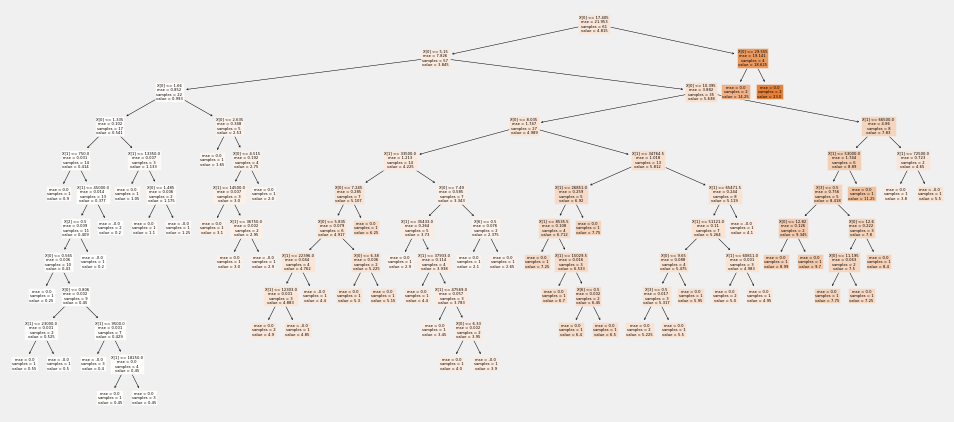

In [112]:
df=dr.fit(x_test,y_pred2)
plt.figure(figsize=(15,7))
plot_tree(df,filled=True)

### Random Forest Regression

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)

In [114]:
y_pred3

array([ 5.036     ,  0.518     ,  4.458     ,  7.58346667, 13.895     ,
        4.9065    ,  3.612     ,  0.3952    ,  4.48      ,  5.38202381,
        2.9505    ,  0.8375    ,  4.5825    ,  8.1835    ,  7.421     ,
       13.6202    ,  7.1175    ,  3.722     ,  0.5103    ,  1.632     ,
        3.3305    ,  4.7755    ,  5.99178214,  9.7013    ,  0.2064    ,
        0.5714    ,  0.29      ,  0.6198    ,  0.538     ,  5.8375    ,
        3.5215    ,  5.7165    ,  0.4927    ,  7.06      ,  4.308     ,
        1.111     ,  5.8635    ,  4.618     ,  0.2948    ,  8.5035    ,
        7.7153    , 24.3375    ,  4.8435    ,  4.1635    ,  5.75      ,
       11.2841    ,  0.3346    ,  0.626     ,  4.904     ,  6.29654167,
        9.1101    ,  3.064     ,  4.65066667, 24.435     ,  1.1518    ,
        1.1094    ,  0.5666    ,  2.8035    ,  3.3715    ,  2.697     ,
        5.5965    ])

In [115]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [116]:
r_squared3=r2_score(y_test,y_pred3)
r_squared3

0.9189519989693722

In [117]:
mse3=mean_squared_error(y_test,y_pred3)
mse3


2.0486761415353034

Text(0.5, 1.0, 'Mean Square Error of various Algo')

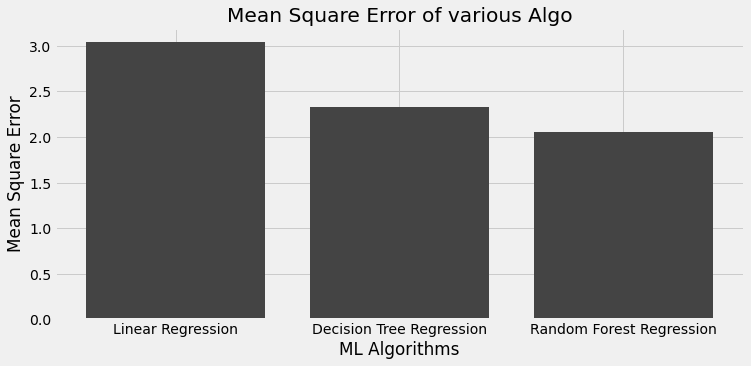

In [118]:
plt.figure(figsize=(11,5)) 
x=[mse1,mse2,mse3]
y=['Linear Regression','Decision Tree Regression','Random Forest Regression']

plt.bar(y,x, color="#444444", label='India Score')
plt.xlabel('ML Algorithms')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error of various Algo')

Text(0.5, 1.0, 'R Sqaured value of various Algo')

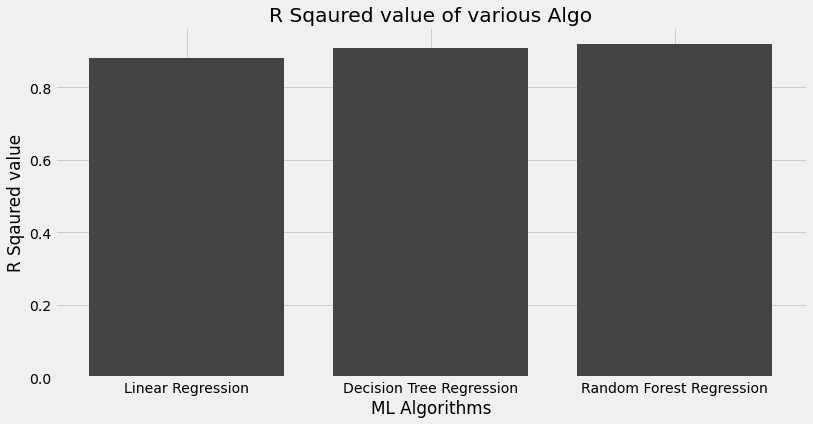

In [119]:
plt.figure(figsize=(12,6)) 
x=[r_squared1,r_squared2,r_squared3]
y=['Linear Regression','Decision Tree Regression','Random Forest Regression']

plt.bar(y,x, color="#444444", label='India Score')
plt.xlabel('ML Algorithms')
plt.ylabel('R Sqaured value')
plt.title('R Sqaured value of various Algo')

In [120]:
#R-squared is a statistical measure that represents the goodness of fit of a regression model. 
#The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted. 

#A value close to zero will represent better quality of the estimator / predictor (regression model). 
#An MSE of zero (0) represents the fact that the predictor is a perfect predictor.



### Since, the Random Forest Regression is showing minimum Mean Square Error and maximum R Square Value among all the regression algorithm, hence, Random Forest Regression fits best for our model..